In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 69.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [4]:
! ls {path}

creditcard.csv


In [5]:
data_path = path + '/creditcard.csv'
data = pd.read_csv(data_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(284807, 31)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


This Shows that data is Highly Imbalanced and biased towards Non_fraudlent   
So we will use a technique for balacing out the Data.   
Which is Under Sampling

In [12]:
legitTransac = data[data.Class == 0]
fraudTransac = data[data.Class == 1]

In [13]:
legitTransac['Amount'].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [14]:
fraudTransac['Amount'].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [15]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
print(legitTransac.shape)
print(fraudTransac.shape)

(284315, 31)
(492, 31)


So We have to basically make a random sample of about 409 rows from legit transanctions     
Then concatenate it with the fraudlent transaction

In [17]:
legit = legitTransac.sample(n=409)

In [18]:
credit_data = pd.concat([legit,fraudTransac],axis=0)

In [19]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
56320,47366.0,-4.219853,0.660588,0.014543,-2.922515,-0.294962,1.776875,-1.595104,-9.939783,-1.137598,...,7.173939,-3.973545,1.547978,-1.031081,0.780426,-0.558373,-0.369632,-0.795679,115.70,0
173849,121668.0,1.876520,-0.917072,-1.578422,-0.820501,0.394848,1.041320,-0.433524,0.308999,1.434692,...,0.346412,1.441111,-0.148184,-1.485128,0.154982,1.173636,-0.031444,-0.099923,45.00,0
93826,64603.0,1.076316,-2.370603,1.306302,-0.995330,-2.276695,1.515513,-2.151924,0.493298,-0.175551,...,-0.014255,0.433659,-0.401563,-0.763137,0.481784,0.134797,0.091888,0.044697,190.00,0
88913,62346.0,-5.956545,-4.739540,2.471594,0.864117,6.000191,-1.801268,-4.888420,-0.838244,1.273455,...,0.959167,-0.259290,-1.875258,-0.738049,0.083731,-0.387464,1.558152,-0.457662,1.18,0
10857,18580.0,1.164815,-0.534955,0.848548,-0.736016,-0.931300,0.160695,-0.985231,0.313092,3.191263,...,-0.123708,0.010992,-0.031766,-0.409328,0.341708,-0.686158,0.062987,0.009162,11.85,0


In [20]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
credit_data.shape

(901, 31)

Now Checking if the sampling done is even or not

In [22]:
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96886.645477,0.024969,-0.066567,-0.005406,-0.020835,0.032979,0.010655,-0.008585,-0.114972,-0.068036,...,0.022879,0.030551,0.035646,-0.001032,0.012585,0.005519,0.019981,-0.038325,-0.008221,97.147873
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Train test split

In [23]:
train_X, test_X, train_y, test_y = train_test_split(credit_data.drop('Class',axis=1),credit_data['Class'],test_size=0.2,random_state=42)

In [24]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(720, 30)
(720,)
(181, 30)
(181,)


Model Training

Here we are using logisitic REgression model   
best Suited for Binary Classification Tasks

In [25]:
model = LogisticRegression()

In [26]:
model.fit(train_X,train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [27]:
# Checking Accuracy score on train Data
train_pred = model.predict(train_X)
train_acc = accuracy_score(train_pred,train_y)
print(train_acc)

0.9347222222222222


In [28]:
# Checking prediction on Test data now
test_pred = model.predict(test_X)
test_acc = accuracy_score(test_pred,test_y)
print(test_acc)

0.9171270718232044


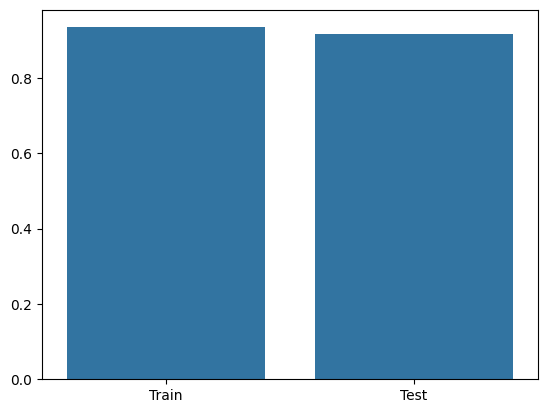

In [29]:
# Visualizing Accuracy Scores
sns.barplot(x=['Train','Test'],y=[train_acc,test_acc])
plt.show()

Therefore here we got a very good Accuracy Score on both training set and test set implying that this model is trained pretty perfectly a on the training set as well as genralized perfectly on training set too.